In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
df = pd.read_csv('data/weight_height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df.shape

(10000, 3)

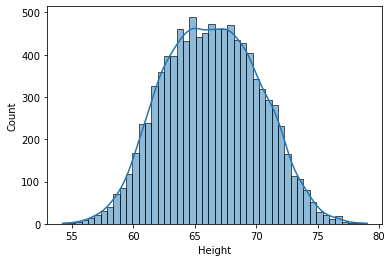

In [5]:
sns.histplot(df['Height'], kde=True)
plt.show()

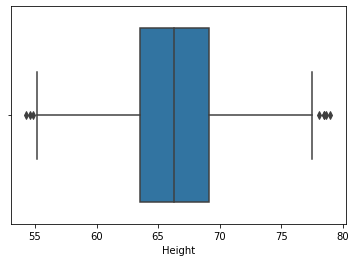

In [6]:
sns.boxplot(x="Height", data=df)
plt.show()

In [7]:
# Calculating boundary
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

upper_limit, lower_limit

(74.7857900583366, 58.13441158671655)

In [8]:
# outliers
df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### trimming

In [9]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
new_df.shape

(9800, 3)

In [10]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

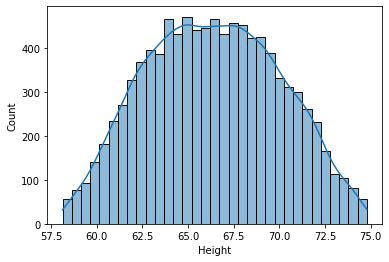

In [11]:
sns.histplot(new_df['Height'], kde=True)
plt.show()

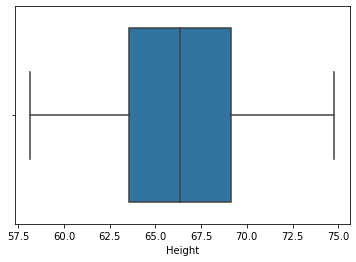

In [12]:
sns.boxplot(x="Height", data=new_df)
plt.show()

### capping / winsorization

In [13]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

df.shape

(10000, 3)

In [14]:
df.Height.describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

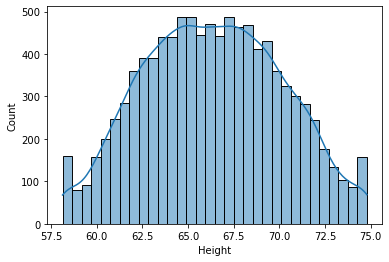

In [15]:
sns.histplot(df['Height'], kde=True)
plt.show()

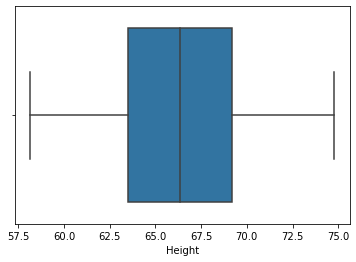

In [16]:
sns.boxplot(x="Height", data=df)
plt.show()